First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:
age         0
sex         0
bmi         0
c

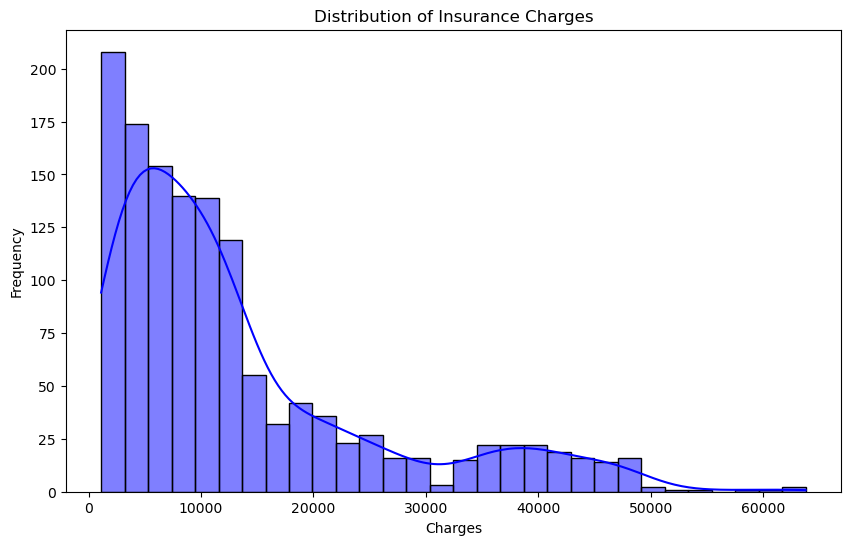

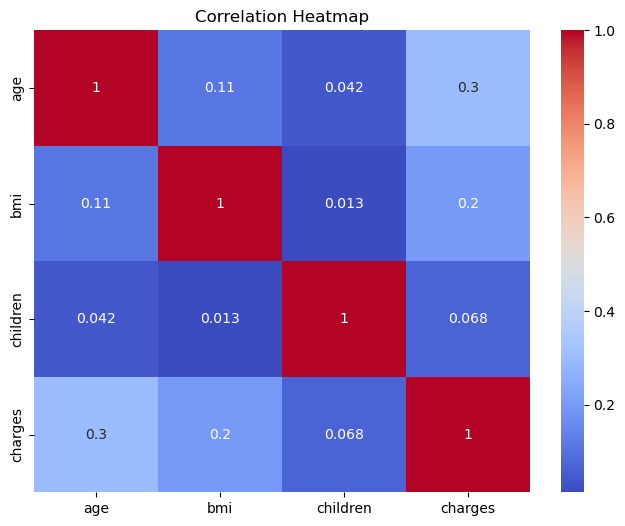

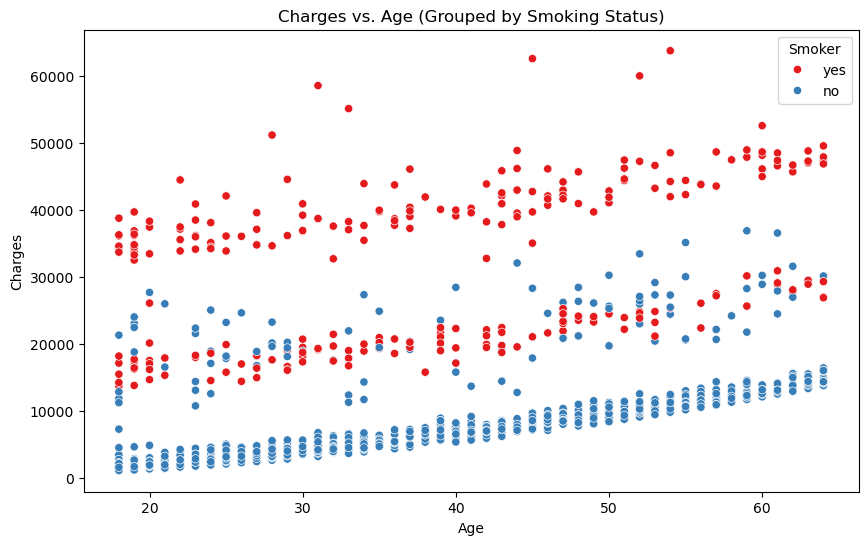

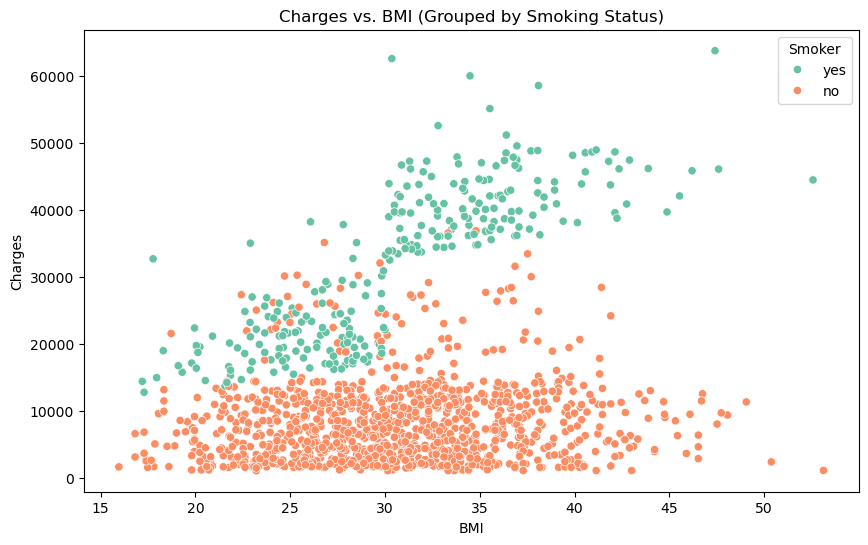

C:\Users\chefe\AppData\Local\Temp\ipykernel_16264\3686467465.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=data, palette="Set3")


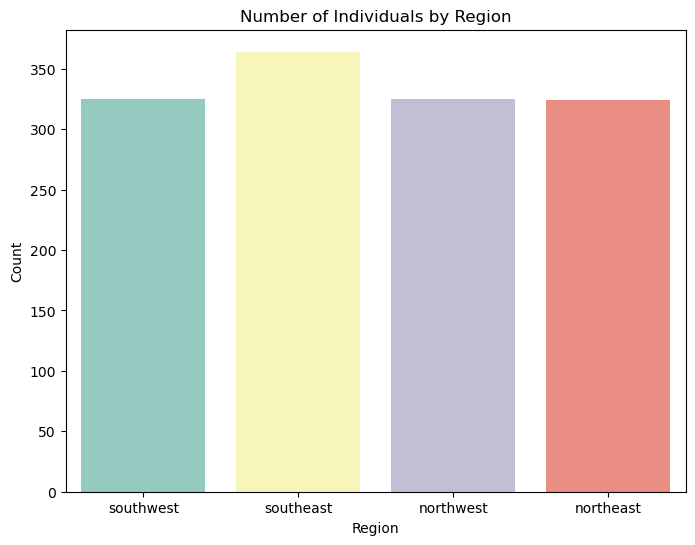

C:\Users\chefe\AppData\Local\Temp\ipykernel_16264\3686467465.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=data, palette="Set3")


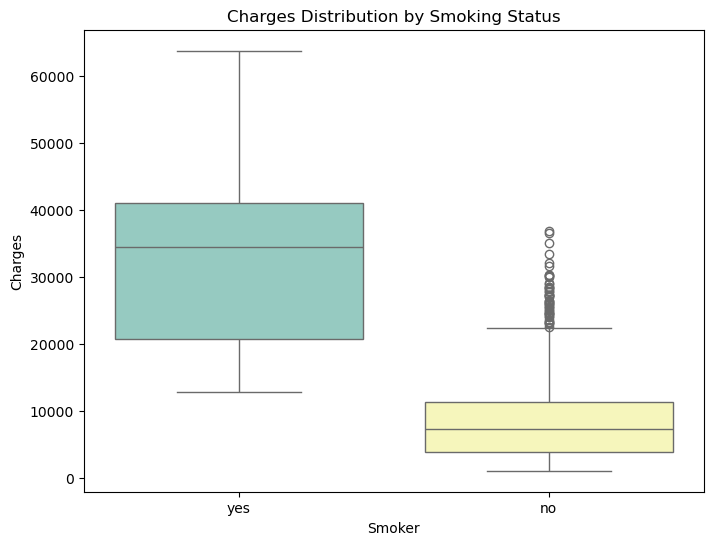

Mean Squared Error: 131440262.76073726
Predicted Charge: $9578.07


C:\Users\chefe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
from typing import Tuple, Any
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def load_and_explore_data(file_path: str) -> pd.DataFrame:

    insurance_data = pd.read_csv(file_path)
    print("First few rows:")
    print(insurance_data.head())
    print("\nDataset Info:")
    print(insurance_data.info())
    print("\nMissing Values:")
    print(insurance_data.isnull().sum())
    print("\nSummary Statistics:")
    print(insurance_data.describe())
    print("\nColumns:")
    print(insurance_data.columns)
    
    return insurance_data

def visualize_data(data: pd.DataFrame) -> None:

    # Charges distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data['charges'], kde=True, color="blue")
    plt.title("Distribution of Insurance Charges")
    plt.xlabel("Charges")
    plt.ylabel("Frequency")
    plt.show()
    
    # Correlation heatmap
    numeric_data = data.select_dtypes(include=[np.number])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
    
    # Charges vs Age
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y='charges', hue='smoker', data=data, palette="Set1")
    plt.title("Charges vs. Age (Grouped by Smoking Status)")
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(title="Smoker")
    plt.show()
    
    # BMI vs Charges (Smoking Status)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data, palette="Set2")
    plt.title("Charges vs. BMI (Grouped by Smoking Status)")
    plt.xlabel("BMI")
    plt.ylabel("Charges")
    plt.legend(title="Smoker")
    plt.show()

    # Countplot for Regions
    plt.figure(figsize=(8, 6))
    sns.countplot(x='region', data=data, palette="Set3")
    plt.title("Number of Individuals by Region")
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.show()
    
    # Charges by Smoking Status
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='smoker', y='charges', data=data, palette="Set3")
    plt.title("Charges Distribution by Smoking Status")
    plt.xlabel("Smoker")
    plt.ylabel("Charges")
    plt.show()

def train_insurance_model(
    data: pd.DataFrame,
    features: list[str],
    target: str,
    test_size: float = 0.2,
    random_state: int = 42
) -> Tuple[LinearRegression, float]:

    X = data[features]
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return model, mse

def predict_insurance_charge(
    model: LinearRegression,
    age: float,
    bmi: float
) -> float:

    new_data = np.array([[age, bmi]])
    return float(model.predict(new_data)[0])

# Load and explore data
insurance_data = load_and_explore_data("insurance.csv")

# Create visualizations
visualize_data(insurance_data)

# Train model
features = ['age', 'bmi']
model, mse = train_insurance_model(insurance_data, features, 'charges')
print(f"Mean Squared Error: {mse}")

# Make prediction
predicted_charge = predict_insurance_charge(model, age=30, bmi=25.5)
print(f"Predicted Charge: ${predicted_charge:.2f}")
